Linear & Lasso Regression Model


Importing Dependencies

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Lasso
from sklearn import metrics

Loading the dataset

In [2]:
car_data = pd.read_csv('/content/car data.csv')

In [5]:
car_data.head()     #inspecting first five rows of dataset

,Car_Name,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner
0,ritz,2014,3.35,5.59,27000,Petrol,Dealer,Manual,0
1,sx4,2013,4.75,9.54,43000,Diesel,Dealer,Manual,0
2,ciaz,2017,7.25,9.85,6900,Petrol,Dealer,Manual,0
3,wagon r,2011,2.85,4.15,5200,Petrol,Dealer,Manual,0
4,swift,2014,4.60,6.87,42450,Diesel,Dealer,Manual,0


In [6]:
car_data.shape

(301, 9)

In [7]:
#getting some information about the dataset
car_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 301 entries, 0 to 300
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Car_Name       301 non-null    object 
 1   Year           301 non-null    int64  
 2   Selling_Price  301 non-null    float64
 3   Present_Price  301 non-null    float64
 4   Kms_Driven     301 non-null    int64  
 5   Fuel_Type      301 non-null    object 
 6   Seller_Type    301 non-null    object 
 7   Transmission   301 non-null    object 
 8   Owner          301 non-null    int64  
dtypes: float64(2), int64(3), object(4)
memory usage: 21.3+ KB


In [8]:
#checking the number of missing values
car_data.isnull().sum()

Car_Name         0
Year             0
Selling_Price    0
Present_Price    0
Kms_Driven       0
Fuel_Type        0
Seller_Type      0
Transmission     0
Owner            0
dtype: int64

In [9]:
#checking the distribution of categorical data
print(car_data.Fuel_Type.value_counts())
print(car_data.Seller_Type.value_counts())
print(car_data.Transmission.value_counts())

Petrol    239
Diesel     60
CNG         2
Name: Fuel_Type, dtype: int64
Dealer        195
Individual    106
Name: Seller_Type, dtype: int64
Manual       261
Automatic     40
Name: Transmission, dtype: int64


In [10]:
#encoding the data or change the text into the number
#Encoding 'Fuel_Type' column
car_data.replace({'Fuel_Type':{'Petrol':0, 'Diesel':1, 'CNG':2}}, inplace=True)

#Encoding 'Seller_Type' column
car_data.replace({'Seller_Type':{'Dealer':0, 'Individual':1}}, inplace=True)

#Encoding 'Transmission' column
car_data.replace({'Transmission':{'Manual':0, 'Automatic':1}}, inplace=True)

In [11]:
car_data.head()

,Car_Name,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner
0,ritz,2014,3.35,5.59,27000,0,0,0,0
1,sx4,2013,4.75,9.54,43000,1,0,0,0
2,ciaz,2017,7.25,9.85,6900,0,0,0,0
3,wagon r,2011,2.85,4.15,5200,0,0,0,0
4,swift,2014,4.60,6.87,42450,1,0,0,0


Splitting the data and target

In [12]:
x = car_data.drop(['Selling_Price', 'Car_Name'], axis = 1)
y = car_data['Selling_Price']

In [13]:
print(x)

     Year  Present_Price  Kms_Driven  Fuel_Type  Seller_Type  Transmission  \
0    2014           5.59       27000          0            0             0   
1    2013           9.54       43000          1            0             0   
2    2017           9.85        6900          0            0             0   
3    2011           4.15        5200          0            0             0   
4    2014           6.87       42450          1            0             0   
..    ...            ...         ...        ...          ...           ...   
296  2016          11.60       33988          1            0             0   
297  2015           5.90       60000          0            0             0   
298  2009          11.00       87934          0            0             0   
299  2017          12.50        9000          1            0             0   
300  2016           5.90        5464          0            0             0   

     Owner  
0        0  
1        0  
2        0  
3        0 

In [14]:
print(y)

0       3.35
1       4.75
2       7.25
3       2.85
4       4.60
       ...  
296     9.50
297     4.00
298     3.35
299    11.50
300     5.30
Name: Selling_Price, Length: 301, dtype: float64


Splitting the data into training data & test data

In [16]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.1, random_state=2)

In [17]:
print(x.shape, x_train.shape, x_test.shape, y_train.shape, y_test.shape)

(301, 7) (270, 7) (31, 7) (270,) (31,)


Model Training

1. Linear Regression

In [20]:
#loading the linear regression model
lin_reg_model = LinearRegression()

In [21]:
lin_reg_model.fit(x_train, y_train)

LinearRegression()

Model Evaluation

In [22]:
#prediction on training data
training_data_prediction = lin_reg_model.predict(x_train)

In [23]:
#R squared error
error_score = metrics.r2_score(y_train, training_data_prediction)
print("R squared error is:", error_score)

R squared error is: 0.8799451660493711


Visualize the actual prices and predicted prices

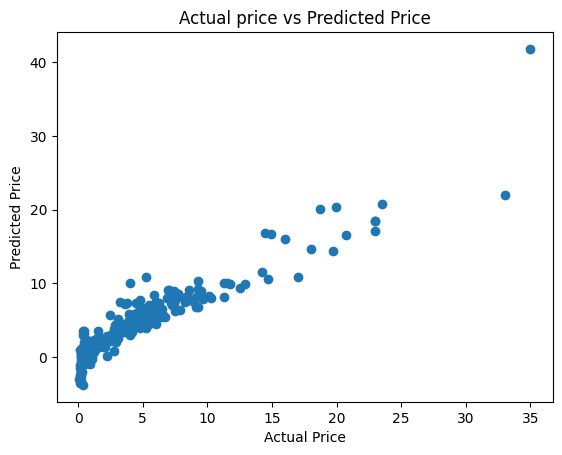

In [24]:
plt.scatter(y_train, training_data_prediction)
plt.xlabel("Actual Price")
plt.ylabel("Predicted Price")
plt.title('Actual price vs Predicted Price')
plt.show()

In [25]:
#prediction on test data
test_data_prediction = lin_reg_model.predict(x_test)

In [26]:
#R squared error
error_score = metrics.r2_score(y_test, test_data_prediction)
print("R squared error is:", error_score)

R squared error is: 0.8365766715027051


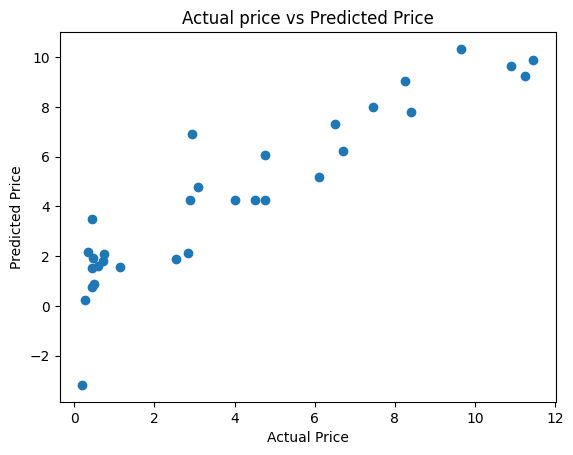

In [27]:
plt.scatter(y_test, test_data_prediction)
plt.xlabel("Actual Price")
plt.ylabel("Predicted Price")
plt.title('Actual price vs Predicted Price')
plt.show()

Lasso Regression

In [28]:
#loading the linear regression model
lass_reg_model = Lasso()

In [29]:
lass_reg_model.fit(x_train, y_train)

Lasso()

Model Evaluation

In [30]:
#prediction on training data
training_data_prediction = lass_reg_model.predict(x_train)

In [31]:
#R squared error
error_score = metrics.r2_score(y_train, training_data_prediction)
print("R squared error is:", error_score)

R squared error is: 0.8427856123435794


Visualize the actual prices and predicted prices

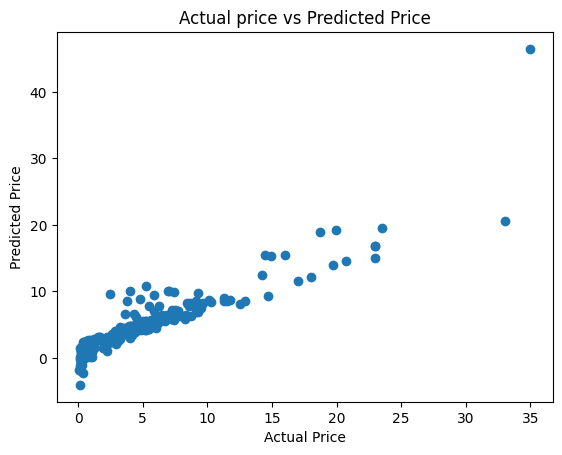

In [32]:
plt.scatter(y_train, training_data_prediction)
plt.xlabel("Actual Price")
plt.ylabel("Predicted Price")
plt.title('Actual price vs Predicted Price')
plt.show()

In [34]:
#prediction on test data
test_data_prediction = lass_reg_model.predict(x_test)

In [35]:
#R squared error
error_score = metrics.r2_score(y_test, test_data_prediction)
print("R squared error is:", error_score)

R squared error is: 0.8709167941173195


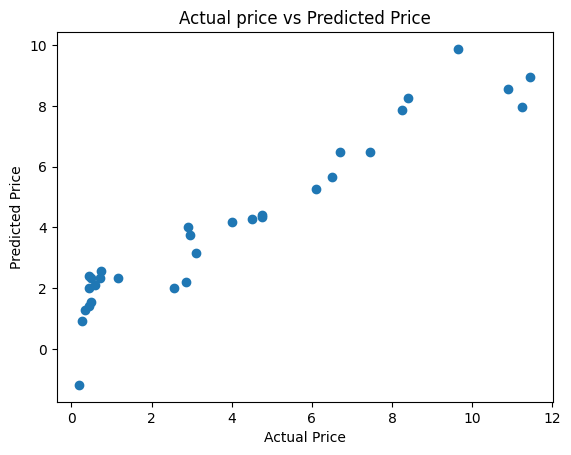

In [36]:
plt.scatter(y_test, test_data_prediction)
plt.xlabel("Actual Price")
plt.ylabel("Predicted Price")
plt.title('Actual price vs Predicted Price')
plt.show()